In [2]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D, FermiVelocityZQL

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#Some global and default parameters
SitesCount_XDefault = 400
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.1, pzNode2 = -0.6314028, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     EnergyNode2 = 0.049189807,
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

pzMin = -1
pzMax = 1
pzCount = 30

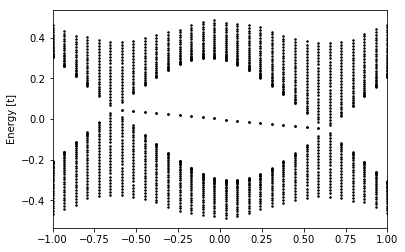

In [2]:
params = copy(ParametersDefault)

evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, evals, evecs

## Extraction of the z-velocity of the Fermi arcs

### Extraction of the velocity for $p^z$ around a Weyl node

In [3]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.01
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.04851469 - params.EnergyNode2)/0.01)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04799216  0.04877692  0.04956169  0.05034646] while the expected Weyl-node energy is 0.049189807
[ 0.04851469  0.04851469  0.05599382  0.05613517]
[ 0.0457664   0.0457664   0.08269876  0.08272621]
-0.06751170000000029
-0.06846814000000007


### Extraction of the velocity for $p^z$ in between the Weyl nodes (TO REVISE: maybe it is better to Taylor-expand around $p^z=0$ instead?)

In [43]:
params = copy(ParametersDefault)

#If I make 8000 sites instead of 7000, the numerical error appears somehow 
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(7000)
params.pz = 0.
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params.pz = 0.05
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((-0.00416493)/0.05)


del fsys_finerResolution, params, evals, evecs

[ -2.95881015e-01   5.08635444e-19   9.20209656e-18   2.95910607e-01]
[-0.00416493 -0.00416493  0.2849755   0.28503678]
-0.08329859999999999


### The FA spectrum is odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [76]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = 0.3
params.py = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = -0.3
params.py = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = 0.3
params.py = 0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = -0.3
params.py = -0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.22359902  0.17434565  0.2524964   0.25270577]
[-0.25270629 -0.25249908 -0.17434565  0.22359902]
[-0.42058329  0.37132993  0.4149784   0.41511229  0.41533535  0.4156474
  0.41604823  0.41653755  0.41711503  0.41778026  0.41853279  0.41937212
  0.42029765  0.42130882  0.42240559]
[-0.42240524 -0.4213089  -0.42029771 -0.41937223 -0.4185328  -0.41778026
 -0.41711503 -0.41653755 -0.41604823 -0.4156474  -0.41533535 -0.41511229
 -0.4149784  -0.37132993  0.42058329]


### Somehow the FA spectrum is additively separable wrt $p^z$ and $p^y$, even at the level of the microscopic theory!

In [140]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.1
params.py = 0.05
params.FermiEnergy = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(-0.09961066+0.00831945)

params.FermiEnergy = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.09961066+0.00831945)


del fsys_finerResolution, params, evals, evecs

[-0.26941774 -0.26919804  0.00831945  0.00831945]
[-0.31331972 -0.09961066  0.09961066  0.31331672]
[-0.28761516 -0.28727505 -0.28707223 -0.0912912 ]
-0.09129121
[-0.0912912   0.10793011  0.31887111  0.31907523]
0.10793011000000001


## Deformation of the boundary condition

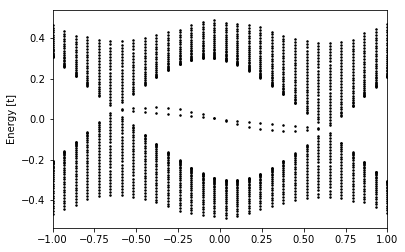

In [30]:
params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, evals, evecs

### Extraction of the velocity for $p^z$ around a Weyl node

In [33]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.05115345 - params.EnergyNode2)/0.05)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04801043  0.04879544  0.04958045  0.05036546] while the expected Weyl-node energy is 0.049189807
[ 0.0457664   0.05115345  0.08269878  0.08272627  0.08277205  0.08283619]
0.03927286000000002
-0.06846814000000007


### Extraction of the velocity for $p^z$ in between the Weyl nodes

In [47]:
params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

#If I make 8000 sites instead of 7000, the numerical error appears somehow 
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(7000)
params.pz = 0.
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params.pz = 0.05
params.FermiEnergy = 0.
params.EigenvectorsCount = 6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((-0.00416493)/0.05)
print((-0.01127262)/0.05)


del fsys_finerResolution, params, evals, evecs

[ -2.95902032e-01   5.63739959e-20   9.20209656e-18   2.95894130e-01]
[-0.01127262 -0.00416493  0.28496814  0.28499358  0.28506003  0.2851316 ]
-0.08329859999999999
-0.2254524


### The FA spectrum is still odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [133]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)

params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.


params.EigenvectorsCount = 10
params.FermiEnergy = -0.0
params.pz = 0.2
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.0
params.pz = -0.2
params.py = -0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.11616643  0.2004221   0.24521216  0.24543743  0.24581242  0.24633645
  0.24700864  0.24782753  0.24879197  0.2499001 ]
[-0.24990088 -0.24879267 -0.2478276  -0.24700868 -0.24633646 -0.24581243
 -0.24543743 -0.24521216 -0.2004221   0.11616643]


### But the FA spectrum is no longer separable!

In [141]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(4000)

params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

params.EigenvectorsCount = 4
params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 6
params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = -0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.00831945-0.09961066)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.02222189+0.26900809)


del params, evals, evecs

[-0.26933153 -0.26915217  0.00831945  0.02222189]
[-0.31328744 -0.31325042 -0.09961066  0.26900809  0.31324635  0.3133384 ]
[-0.28742196 -0.28730343 -0.28724711 -0.2871637  -0.28712018 -0.28708347
 -0.28704846 -0.28702174 -0.28700892 -0.0912912 ]
-0.09129121
[-0.0912912   0.28603829  0.31880807  0.31882627  0.31886188  0.31890606
  0.31896155  0.31903856  0.31915258  0.31931416]
0.29122998


### Let us find several valus of FA energy, in order to interpolate it in Mathematica

In [15]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(6000)

params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.
params.EigenvectorsCount = 6
params.py = 0.


params.FermiEnergy = 0.
params.pz = -0.001
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.01
params.pz = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.01
params.pz = -0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.01
params.pz = -0.3
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.01
params.pz = -0.4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.01
params.pz = -0.5
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.05
params.pz = -0.6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.05
params.pz = -0.61
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.049
params.pz = -0.62
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

del fsys_finerResolution, params, evals, evecs

[ -2.95860167e-01  -2.95768090e-01  -2.95707181e-01   8.33333194e-05
   2.26489015e-04   2.96027809e-01]
[-0.2694551  -0.26927875 -0.26917133 -0.26914     0.00831945  0.02222189]
[-0.2256462  -0.22554332 -0.22550729 -0.22547291  0.01655578  0.04154513]
[-0.17056175 -0.17047625 -0.17039925 -0.17037488  0.02462668  0.05416651]
[-0.10820007 -0.10815093 -0.10812437 -0.10811313  0.03245153  0.0577292 ]
[-0.0416861  -0.04164185 -0.04161041 -0.04159158  0.03995213  0.05482147]
[ 0.04705354  0.05037931  0.07034156  0.07042019  0.07055057  0.07073175]
[ 0.04773896  0.04998335  0.06365667  0.06377308  0.06396497  0.06422934]
[ 0.04092921  0.04115231  0.0484196   0.0496031   0.05696755  0.05719043]


In [26]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(6000)

params = copy(ParametersDefault)
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.
params.EigenvectorsCount = 6
params.py = 0.01

params.FermiEnergy = 0.1
params.pz = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.3
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.05
params.pz = -0.5
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.61
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.0199301   0.05415455  0.29658016  0.29658992  0.29663468  0.29667288]
[-0.01161065  0.07547719  0.30156051  0.30159269  0.30164939  0.30173989]
[-0.00337432  0.09157841  0.28374753  0.28377485  0.28384102  0.28391987]
[ 0.00469658  0.09791217  0.24677286  0.24680002  0.2468794   0.2469696 ]
[ 0.01252143  0.09295072  0.19628284  0.19629408  0.19631301  0.19633838]
[ 0.02002203  0.08194527  0.13756017  0.13757883  0.13760992  0.1376524 ]
[ 0.02712344  0.07159381  0.07820186  0.07825983  0.07835616  0.07849045]
[ 0.02780885  0.07073612  0.07377407  0.07384402  0.07396004  0.0741213 ]


In [25]:
#Energy at an extra point, in order to check the validity of the interpolation
params.FermiEnergy = 0.05
params.py = -0.02
params.pz = -0.6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

[ 0.00763672  0.08691175  0.09424932  0.09428647  0.09434831  0.09443487]


### Fermi velocity along z around the Weyl node is significantly different from its $p^y=0$ value!

In [34]:
params.FermiEnergy = 0.05
params.py = -0.024

params.pz = -0.6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.55
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

(0.09138572-0.09488199)/0.05

[-0.00081941  0.09488199  0.10143331  0.10146538  0.10151887  0.1015938 ]
[-0.00508097  0.09138572  0.12129597  0.12131871  0.12135665  0.1214099 ]


-0.06992539999999992

# Now, let us turn the magnetic field

## Original boundary

In [18]:
params = copy(ParametersDefault)
params.lBinv2 = 1. / 50.**2

pzStart = -0.553
pzEnd = 0.703

GridNumber = 20
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params)
    print(velocityCash,end=',')
    
print('')

#VelocityIntegral = 0.
GridNumber = 40
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params)
    print(velocityCash,end=',')    
#    VelocityIntegral += velocityCash
# VelocityIntegral = VelocityIntegral * (pzEnd - pzStart) / GridNumber
# print(VelocityIntegral, -params.EnergyNode2)


del params, pzStart, pzEnd, GridNumber, velocityCash #, VelocityIntegral 

-0.479216674133,-0.134332604138,-0.1020819339,-0.0944769209242,-0.0903872868523,-0.0885539008031,-0.0875201941554,-0.0866876469269,-0.0857376866317,-0.0844519522638,-0.0826324637785,-0.0800398281618,-0.0762985215441,-0.0706797098848,-0.0615053304344,-0.0436475512387,-0.00540690586756,0.097585994278,0.332785735203,0.690725385414,
-0.479216674133,-0.192083573519,-0.136005012841,-0.11825068444,-0.102947003937,-0.096578522694,-0.0949786212891,-0.0923526952112,-0.0906636274933,-0.089526395584,-0.0887262075438,-0.0881314215787,-0.0876557612706,-0.0872393727743,-0.0868384339378,-0.0864190538996,-0.0859534655505,-0.0854174811984,-0.0847886295877,-0.084044605055,-0.0831617512812,-0.0821133176967,-0.0808671761627,-0.0793825531815,-0.0776050712721,-0.0754589035092,-0.0728339381928,-0.0695641986555,-0.0653910046755,-0.0599016827463,-0.0515519122471,-0.041095240869,-0.0252448366585,-0.00105874675242,0.0405820985331,0.10591171151,0.204280406455,0.340179766169,0.50987813957,0.690725385414,

In [19]:
pzStart = -0.553
pzEnd = 0.703

fsys_1DRefine = diagonalizer.FinalizedSystem_1D(800)
paramsRefine = copy(ParametersDefault)
paramsRefine.lBinv2 = 1. / 50.**2
paramsRefine.x_shift= (800 - 1.)/2.

GridNumber = 40
for i in range(GridNumber):
    paramsRefine.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1DRefine, paramsRefine)
    print(velocityCash,end=',')
    
    
del fsys_1DRefine, paramsRefine, pzStart, pzEnd, GridNumber, velocityCash

-0.482802265788,-0.192208639656,-0.132315863959,-0.115555838415,-0.102253771791,-0.0967398439288,-0.0924335940047,-0.088919547627,-0.0884434951317,-0.0855510862915,-0.087251360515,-0.0862704472985,-0.0856400534343,-0.0851687880711,-0.0847511977822,-0.0843292398109,-0.0838679068657,-0.083342203885,-0.0827305106151,-0.0820114181854,-0.0811621261763,-0.0801567424624,-0.0744658052733,-0.0775396668246,-0.0758254351157,-0.073729684604,-0.0710980022259,-0.0676122044102,-0.0624026974712,-0.0638248733572,-0.0515554695068,-0.0466890061848,-0.0252699312802,-0.00147247985378,0.0414018469403,0.105910328479,0.20396003291,0.341284081499,0.513375427424,0.690695966029,

## Deformed boundary

In [22]:
params = copy(ParametersDefault)
params.lBinv2 = 1. / 50.**2
params.Rescale_onsite0 = 3.
params.Rescale_onsite1 = 3.

pzStart = -0.553
pzEnd = 0.703

GridNumber = 40
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params)
    print(velocityCash,end=',')

-0.479216674684,-0.192083573638,-0.136005012819,-0.11825068289,-0.102947003829,-0.096578522703,-0.0949786482962,-0.0923526952475,-0.0906636274935,-0.089526395584,-0.0887262075438,-0.0881314215787,-0.0876557612706,-0.0872393727743,-0.0868384339378,-0.0864190538996,-0.0859534655505,-0.0854174811985,-0.0847886295877,-0.084044605055,-0.0831617512813,-0.0821133176967,-0.0808671761627,-0.0793825531815,-0.0776050712721,-0.0754589035092,-0.0728339381928,-0.0695641986555,-0.065391004678,-0.0599016834254,-0.0515519124133,-0.0410952408639,-0.0252448366775,-0.00105874655753,0.0405820985139,0.105911711512,0.204280406543,0.340179766256,0.509878139574,0.690725385417,